# We Gon' try to shrink the RQ5 code cause its buff as heck


In [83]:
import seaborn as sns
import sys 
sys.path.append('..')
from scripts import project_functions as pf # Method Chain located in scripts directory
raw_data = "../../data/raw/listings.csv"
df = pf.load_and_process(raw_data) 

        

,Name,Room Type,Days of Stay,Price per Night ($),# of tenants,Total Reviews,Experience Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Overall Rating,Bayesian Rating
0,D1 - Million Dollar View 2 BR,Entire home/apt,90,150.0,4,16,9.3,9.0,10.0,9.0,10.0,47.3,48.383069
1,Monthly (or Longer ) Designer One Bedroom Down...,Entire home/apt,30,85.0,1,430,9.3,10.0,9.0,10.0,10.0,48.3,48.366228
2,Vancouver's best kept secret,Entire home/apt,30,145.0,1,88,9.8,10.0,10.0,10.0,10.0,49.8,48.572428
3,EcoLoft Vancouver,Entire home/apt,3,140.0,3,33,9.5,9.0,10.0,9.0,10.0,47.5,48.366073
4,Close to PNE/Hastings Park and East Village,Entire home/apt,3,195.0,3,5,9.6,10.0,10.0,10.0,10.0,49.6,48.418172
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3456,convenient and safe location near Killarney area,Entire home/apt,7,58.0,1,2,8.0,10.0,8.0,8.0,10.0,44.0,48.395965
3457,❤️DT+Parking🌈AmazingView⭐️+Transit+Stadium=ForU,Entire home/apt,1,140.0,2,1,10.0,10.0,10.0,10.0,10.0,50.0,48.411645
3458,Stunning Gastown Loft in Vancouver Downtown,Entire home/apt,2,117.0,1,2,10.0,10.0,10.0,10.0,10.0,50.0,48.414037
3459,Central 1 BR suite in the heart of Cambie Village,Entire home/apt,2,85.0,2,1,10.0,10.0,10.0,10.0,10.0,50.0,48.411645


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#display(df)

In [80]:
df_q2 = df.filter(['Name','Price per Night ($)','Bayesian Rating'])
top=10
df_q21 = df_q2[df_q2['Price per Night ($)'] < 100].sort_values(by='Bayesian Rating',ascending=False).reset_index(drop=True).reset_index().head(top) # <$100

In [81]:
def Ranker(df,top,xsize,color,dollar):
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.figure(figsize=(10,top*0.5))
    plt.xlim(xsize)
    plot = sns.barplot(data=df,y='Name',x='Price per Night ($)',palette=color)
    sns.despine()
    plt.bar_label(plot.containers[0],labels=df['Price per Night ($)'].round(2))
    i=0
    bars = range(1,top+1)
    for p in plot.patches:
        plot.annotate("Rank #"+str(bars[i])+" | Rating:"+str(df['Bayesian Rating'][i].round(3)),
                   (xsize[0]+5,p.get_y()+0.5)
                   )
        i = i+1
    plot.set(title=f"Top {top} Airbnbs '{dollar}' dollars", ylabel="AirBnbs")
    return(plt.show())

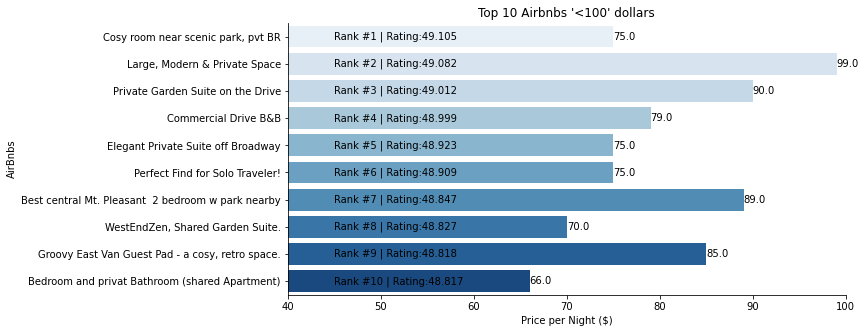

In [82]:
Ranker(df=df_q21,dollar="<100",top=top,color='Blues',xsize=(40,100))

In [ ]:
'''
plt.figure(figsize=(10,top*0.5))
plt.xlim((30,100))
plot1 = sns.barplot(data=df_q21,y='Name',x='Price per Night ($)',palette='Purples')
plot1.spines['right'].set_visible(False)
plot1.spines['top'].set_visible(False)
plt.bar_label(plot1.containers[0],labels=df_q21['Price per Night ($)'].round(2))
i=0
bars = range(1,top+1)
for p in plot1.patches:
    plot1.annotate("Rank #"+str(bars[i])+" | Rating:"+str(df_q21['Bayesian Rating'][i].round(2)),
               (p.get_width()/4+20,p.get_y()+0.5)
               )
    i = i+1
plot1.set(title=f"Top {top} Airbnbs under $100", ylabel="AirBnbs")

plt.show()

# --------------------------------------------------
plt.figure(figsize=(10,top*0.5))
plt.xlim((40,200))
plot2 = sns.barplot(data=df_q22,y='Name',x='Price per Night ($)',palette='Greens')
sns.despine()
plt.bar_label(plot2.containers[0],labels=df_q22['Price per Night ($)'].round(2))
i=0
bars = range(1,top+1)
for p in plot2.patches:
    plot2.annotate("Rank #"+str(bars[i])+" | Rating:"+str(df_q22['Bayesian Rating'][i].round(2)),
               (p.get_width()/4+25,p.get_y()+0.5)
               )
    i = i+1
plot2.set(title=f"Top {top} Airbnbs between $(100-200)", ylabel="AirBnbs")
plt.show()
# --------------------------------------------------
plt.figure(figsize=(10,top*0.5))
plt.xlim((100,300))
plot3 = sns.barplot(data=df_q23,y='Name',x='Price per Night ($)',palette='Oranges')
sns.despine()
plt.bar_label(plot3.containers[0],labels=df_q23['Price per Night ($)'].round(2))
i=0
bars = range(1,top+1)
for p in plot3.patches:
    plot3.annotate("Rank #"+str(bars[i])+" | Rating:"+str(df_q23['Bayesian Rating'][i].round(2)),
               (p.get_width()/4+70,p.get_y()+0.5)
               )
    i = i+1
plot3.set(title=f"Top {top} Airbnbs between $(200-300)", ylabel="AirBnbs")
plt.show()
# --------------------------------------------------
plt.figure(figsize=(10,top*0.5))
plt.xlim((150,400))
plot4 = sns.barplot(data=df_q24,y='Name',x='Price per Night ($)',palette='Blues')
sns.despine()
plt.bar_label(plot4.containers[0],labels=df_q24['Price per Night ($)'].round(2))
i=0
bars = range(1,top+1)
for p in plot4.patches:
    plot4.annotate("Rank #"+str(bars[i])+" | Rating:"+str(df_q24['Bayesian Rating'][i].round(2)),
               (p.get_width()/4+100,p.get_y()+0.5)
               )
    i = i+1
plot4.set(title=f"Top {top} Airbnbs between $(300-400)", ylabel="AirBnbs")

plt.show()
# -------------------------------------------------
plt.figure(figsize=(10,top*0.5))
plt.xlim((200,1000))
plot5 = sns.barplot(data=df_q25,y='Name',x='Price per Night ($)',palette='Reds')
sns.despine()
plt.bar_label(plot5.containers[0],labels=df_q25['Price per Night ($)'].round(2))
i=0
bars = range(1,top+1)
for p in plot5.patches:
    plot5.annotate("Rank #"+str(bars[i])+" | Rating:"+str(df_q25['Bayesian Rating'][i].round(2)),
               (p.get_width()/4+120,p.get_y()+0.5)
               )
    i = i+1
plot5.set(title=f"Top {top} Airbnbs above $400", ylabel="AirBnbs")

plt.show()
'''